In [7]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import scipy

In [23]:
a = 303.0
sigma_a = 4.0
pec_vel = 627

print(np.sqrt(2)*a, np.sqrt(2)*sigma_a)

428.50670939904785 5.656854249492381


In [24]:
def cumul_distro(x,a):
    y = scipy.special.erf(x/(a*np.sqrt(2)))
    y = y - np.sqrt(2.0/np.pi) * x * np.exp(-0.5*(x/a)**2)/a
    return y

def distro(x,a):
    y = np.sqrt(2.0/np.pi) * x**2 * np.exp(-0.5*(x/a)**2)/a**3
    return y

In [25]:
x = np.linspace(0,1300,100)

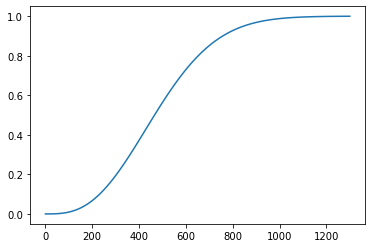

In [26]:
plt.plot(x, cumul_distro(x,a))

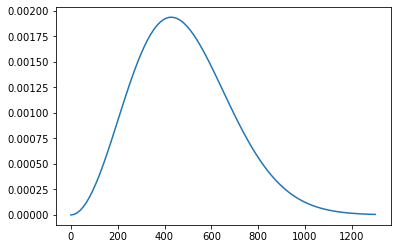

In [27]:
plt.plot(x, distro(x,a))

In [28]:
print(distro(pec_vel,a)/distro(np.sqrt(2)*a,a))
print(np.exp(-0.5*(0.9/1)**2)/np.exp(-0.5*((0/1)**2)))

0.6840424533256633
0.6669768108584744


In [29]:
n_iteration = 10000
a_values = np.random.normal(loc=a,scale=sigma_a, size=n_iteration)
frac = np.ones(n_iteration)
for i in range(n_iteration):
    limit_vel = np.random.normal(loc=pec_vel, scale=22)
    #print(limit_vel)
    #limit_vel = pec_vel
    frac[i] = 1-cumul_distro(limit_vel, a_values[i])

(array([  32.,  291., 1444., 2807., 2984., 1673.,  606.,  138.,   21.,
           4.]),
 array([0.12939137, 0.15448084, 0.17957032, 0.2046598 , 0.22974927,
        0.25483875, 0.27992823, 0.3050177 , 0.33010718, 0.35519666,
        0.38028613]),
 <BarContainer object of 10 artists>)

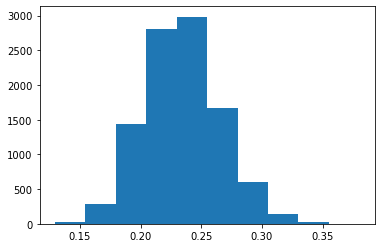

In [30]:
plt.hist(frac)

In [31]:
print(np.mean(frac), np.std(frac))

0.23397886344406288 0.031253607794098304


In [32]:
v = np.array([79.39,77.33,84.09,161.47, 164.65, 169.06, 225.01, 228.01, 231.17,
     236.16, 230.26, 287.90, 280.57, 283.48, 288.06, 296.87 , 293.44,
     274.61, 279.81 , 280.67, 279.11, 281.28, 285.81, 285.14 , 286.30, 
     289.23, 278.45, 277.81, 274.83, 277.62, 277.66])
len(v)
L = np.array([51.7, 51.7, 51.7, 110.7, 110.7, 110.7, 302.6, 302.6, 302.6, 
             357.14, 357.14, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 
            1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62,
            1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62, 1074.62])
x = 1/L
y = v

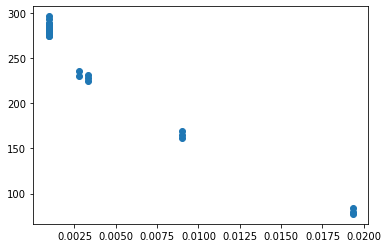

In [18]:
plt.scatter(x, y)

In [19]:
def component(x,a, b):
    y = a * np.exp(-b*x)
    return y

In [20]:
n_iterations = 10000
a_values = np.ones(n_iterations)
s_values = np.ones(n_iterations)
for i in range(n_iterations):
    l = np.arange(len(x))
    ii = np.random.choice(l, size=len(l))
    popt, pcov = curve_fit(component, x[ii], y[ii])
    a_values[i] = popt[0]
    s_values[i] = np.sqrt(pcov[0,0])

299.9431163638043 1.7852029836157917


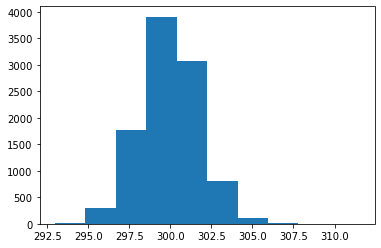

In [21]:
plt.hist(a_values)
print(np.mean(a_values), np.std(a_values))

1.9457806067654289 0.29219004652868064


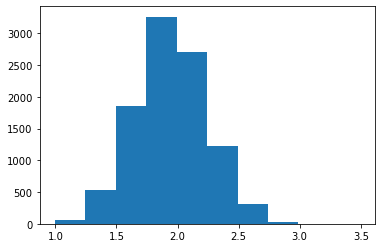

In [22]:
plt.hist(s_values)
print(np.mean(s_values), np.std(s_values))